## Diabetes Dataset

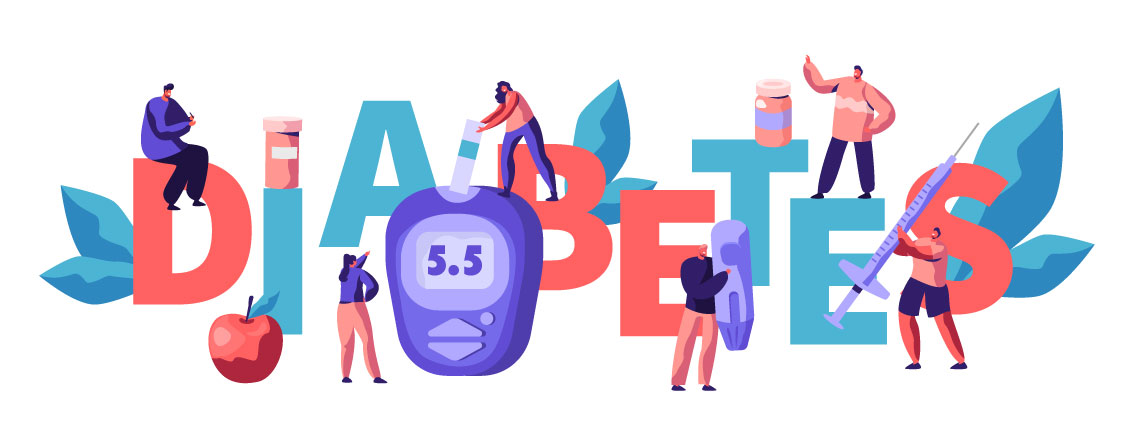

In [738]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-pastel')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

from pandas_profiling import ProfileReport

from catboost import CatBoostClassifier

Image(filename='diabetesgraphic.jpg')

## Problem definition

>Predicting diabetes using various health metrics which have been correlated to high blood sugar, such as high blood pressure, high cholesterol, unhealthy BMI scores and others.

>Creating models that can predict diabetes accurately is of high importance to todays society.


## What kind of data do we have?

>The Dataset was sourced from [Kaggle.](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

##### Our Data Dictionary: 

>* 'Diabetes_binary' - Target - Binary
>* 'HighBP' - High Blood Pressure - Binary
>* 'HighChol' - High Cholesterol - Binary
>* 'CholCheck' - Has checked Cholesterol in the past 5 years - Binary
>* 'BMI' - Body Mass Index - Continuous
>* 'Smoker' - Smoked at least a 100 cigarettes in entire lifetime - Binary
>* 'Stroke' - Has ever had a stroke - Binary
>* 'HeartDiseaseorAttack' - Coronary heart disease (CHD) or Myocardial infarction (MI) - Binary
>* 'PhysActivity' - Physical activity in the past 30 days, excluding job - Binary
>* 'Fruits' - Consumes fruit 1 or more times per day - Binary
>* 'Veggies' - Consumes vegetables 1 or more times per day - Binary
>* 'HvyAlcoholConsump' - 14 Drinks per week for men and 7 drinks per week for women - Binary
>* 'AnyHealthcare' - Have any type of health coverage - Binary
>* 'NoDocbcCost' - Couldn't visit the doctor in the past 12 months because of the cost - Binary
>* 'GenHlth' - Would you say that in general your health is: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
>* 'MentHlth'- Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? Scale 1-30 
>* 'PhysHlth' - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
>* 'DiffWalk' - Do you have serious difficulty walking or climbing stairs? - Binary
>* 'Sex' - 0 = Female & 1 = Male
>* 'Age' - 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
>* 'Education' - Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
>* 'Income' - Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000USD 5 = less than 35,000USD 8 = 75,000USD or more



## Success definition

>* 95% =< Accuracy score.

## Feature exploration

In [787]:
#Loading the data and getting a quick overview of it, using the Pandas Profile Report module.

data = pd.read_csv("diabetes.csv")

profile = ProfileReport(data, minimal=True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [740]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [741]:
##Checking for missing data

data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [742]:
##Checking data types

data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [743]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

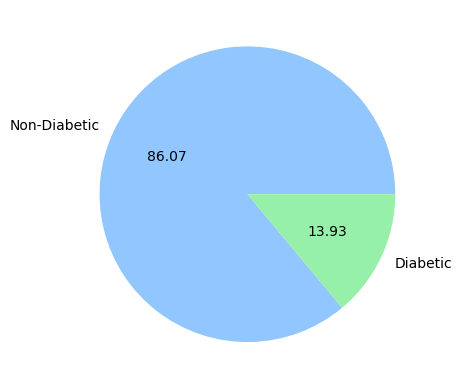

In [786]:
#Checking the distribution of our target label

labels = ['Non-Diabetic', 'Diabetic']
plt.pie(data['Diabetes_binary'].value_counts(), labels=labels, autopct='%.02f');

## Correlation between income levels and veggie & fruit consumption.
* The higher the income of the surveyed people the more likely they are to be consuming fruit and veggies daily.

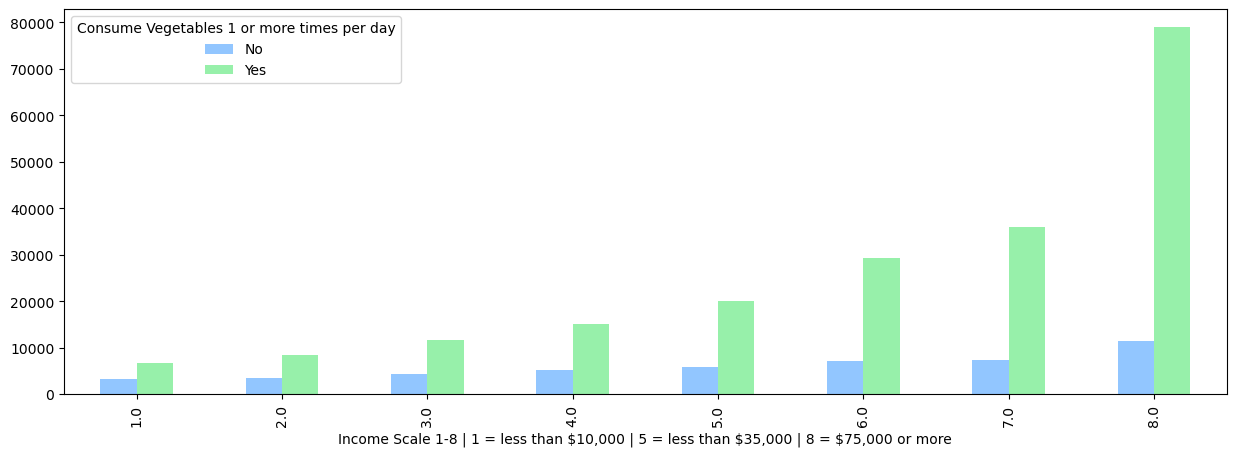

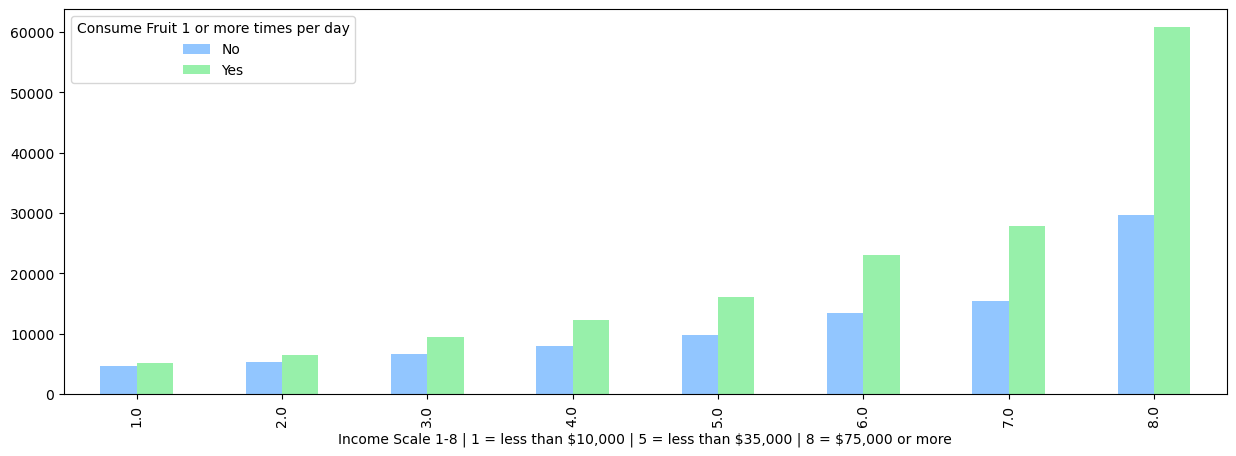

In [744]:
pd.crosstab(data["Income"], data["Veggies"]).plot(kind="bar", figsize=(15,5));
plt.legend(title="Consume Vegetables 1 or more times per day", labels=["No", "Yes"])
plt.xlabel("Income Scale 1-8 | 1 = less than $10,000 | 5 = less than $35,000 | 8 = $75,000 or more")
pd.crosstab(data["Income"], data["Fruits"]).plot(kind="bar", figsize=(15,5));
plt.legend(title="Consume Fruit 1 or more times per day", labels=["No", "Yes"])
plt.xlabel("Income Scale 1-8 | 1 = less than $10,000 | 5 = less than $35,000 | 8 = $75,000 or more");

# Correlation between physical activity and diabetes positivity

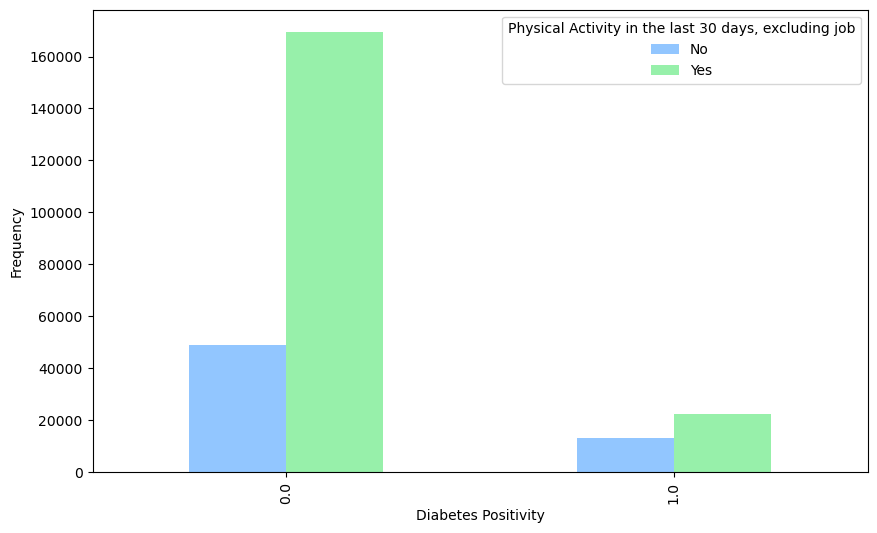

In [745]:
pd.crosstab(data["Diabetes_binary"], data["PhysActivity"]).plot(kind="bar", figsize=(10,6))
plt.legend(title="Physical Activity in the last 30 days, excluding job", labels=["No", "Yes"])
plt.ylabel("Frequency")
plt.xlabel("Diabetes Positivity");

## Diabetes Positivity & BMI

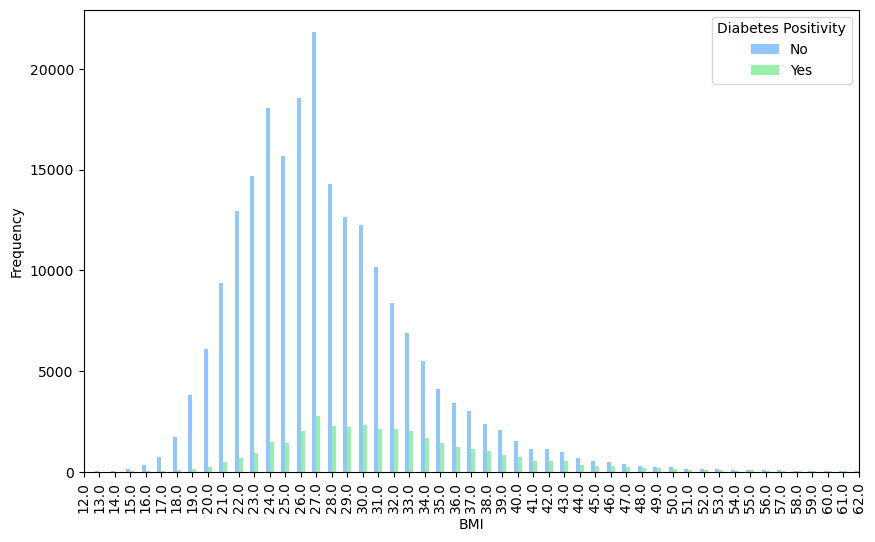

In [746]:
pd.crosstab(data["BMI"], data["Diabetes_binary"]).plot(kind="bar", figsize=(10,6))
plt.legend(title="Diabetes Positivity", labels=["No", "Yes"])
plt.ylabel("Frequency")
plt.xlabel("BMI");
plt.xlim(0.0,50.0);

## Correlation Matrix

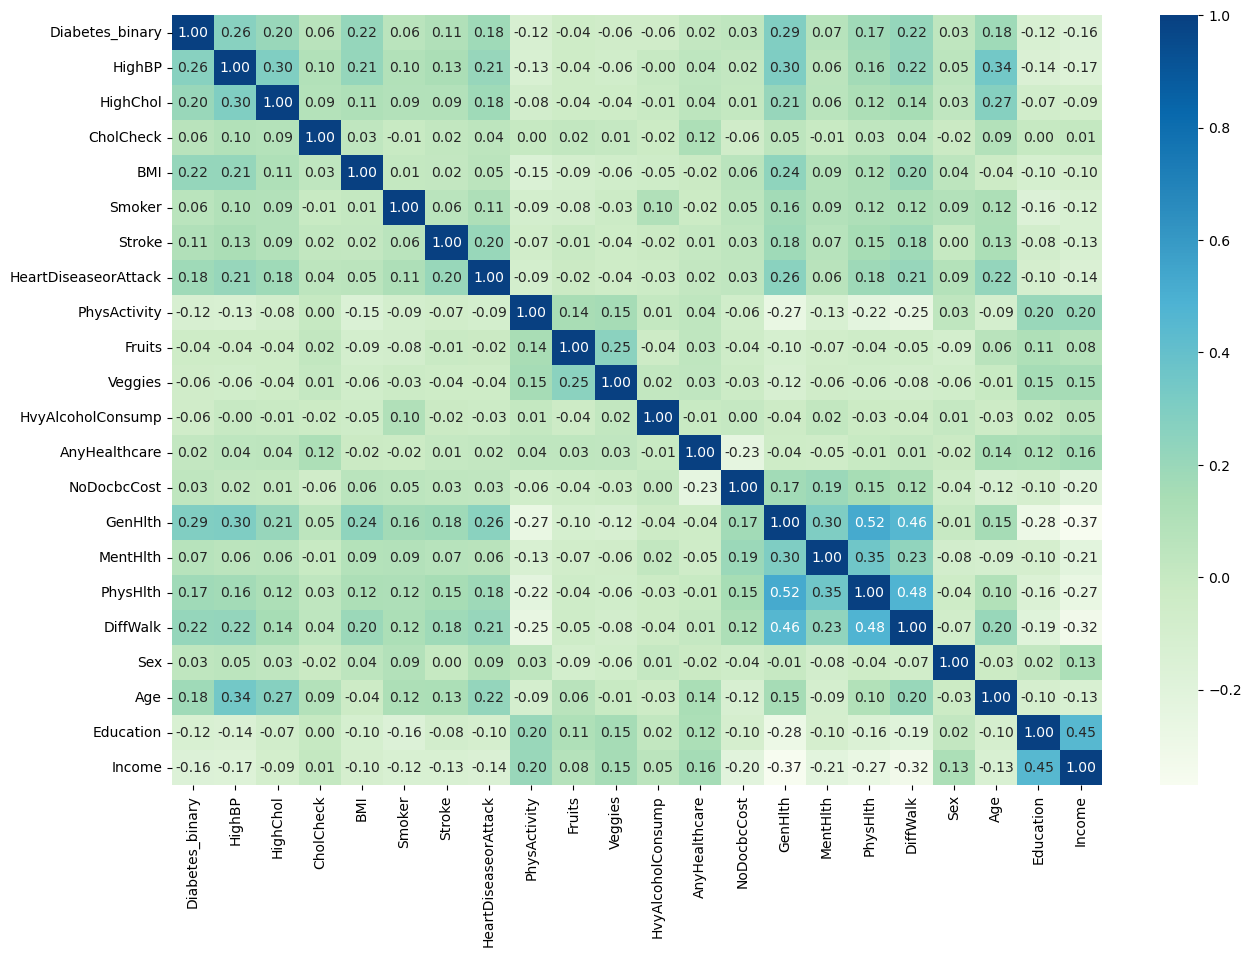

In [747]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix , annot=True, cmap="GnBu", fmt=".2f")

## Correlation Matrix with values with a correlation higher than 0.25

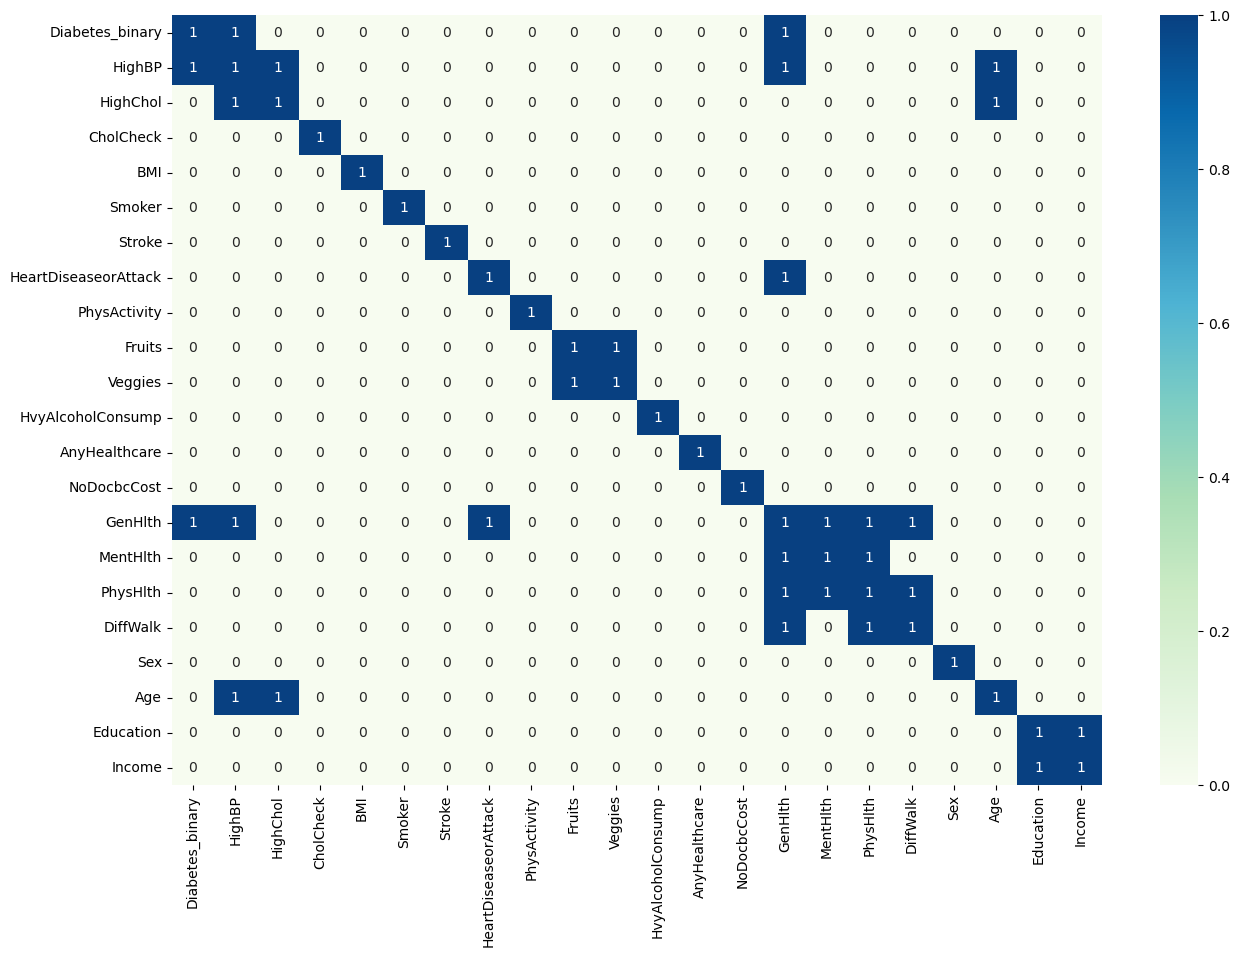

In [748]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix >0.25 , annot=True, cmap="GnBu")

In [749]:
## Getting a dataset with only positive correlation

negatives = correlation_matrix[correlation_matrix['Diabetes_binary']<0.1]
negatives = negatives.index.values

data_test = data.copy()

for negative in negatives:
    data_test.drop(negative, axis=1, inplace=True)

In [750]:
## Initializing a data scaler

scaler = StandardScaler()

# Checking the distribution

In [751]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


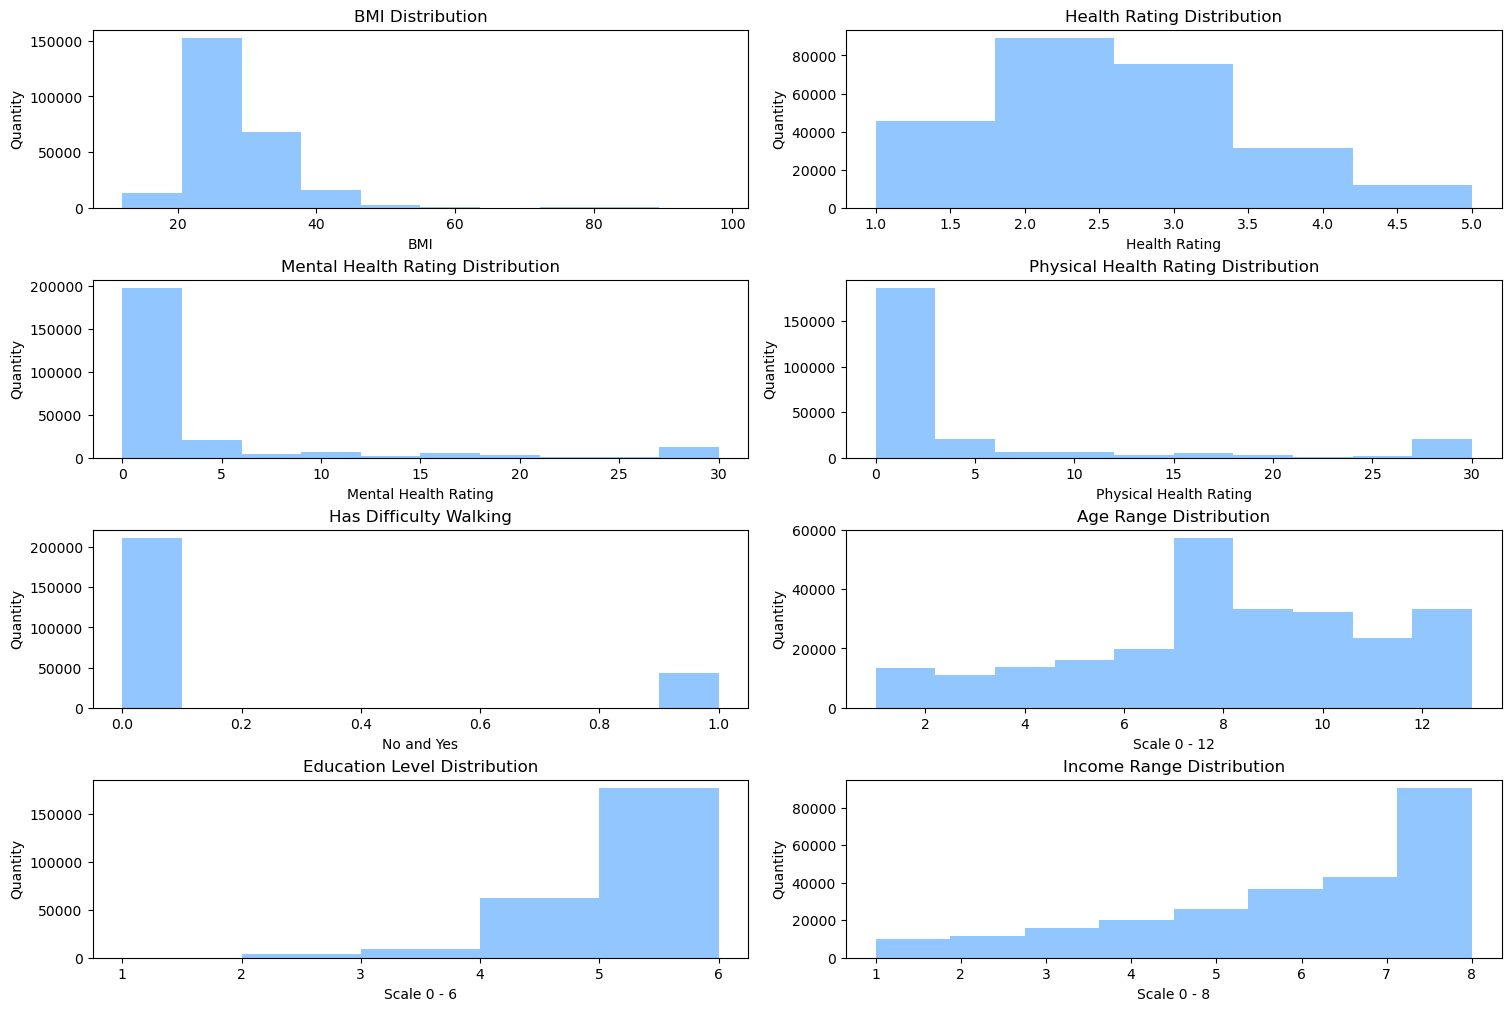

In [752]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(15,10), layout='constrained')

ax[0,0].hist(data['BMI'])
ax[0,0].set(title="BMI Distribution", xlabel="BMI", ylabel="Quantity")

ax[0,1].hist(data['GenHlth'], bins=5)
ax[0,1].set(title="Health Rating Distribution", xlabel="Health Rating", ylabel="Quantity")

ax[1,0].hist(data['MentHlth'])
ax[1,0].set(title="Mental Health Rating Distribution", xlabel="Mental Health Rating", ylabel="Quantity")

ax[1,1].hist(data['PhysHlth'])
ax[1,1].set(title="Physical Health Rating Distribution", xlabel="Physical Health Rating", ylabel="Quantity")

ax[2,0].hist(data['DiffWalk'])
ax[2,0].set(title="Has Difficulty Walking", xlabel="No and Yes", ylabel="Quantity")

ax[2,1].hist(data['Age'])
ax[2,1].set(title="Age Range Distribution", xlabel="Scale 0 - 12", ylabel="Quantity")

ax[3,0].hist(data['Education'], bins=5)
ax[3,0].set(title="Education Level Distribution", xlabel="Scale 0 - 6", ylabel="Quantity")

ax[3,1].hist(data['Income'], bins=8)
ax[3,1].set(title="Income Range Distribution", xlabel="Scale 0 - 8", ylabel="Quantity");

## Modelling

In [754]:
def mass_test(X_train, X_test, y_train, y_test):
    """
    Mass testing models, to check which ones fit the best
    so that we can tune them further.
    """
    
    rbf = RBFSampler(gamma=0.5, random_state=1, n_components=200)
    x_rbf = rbf.fit_transform(X_train)
    x_rbf1 = rbf.fit_transform(X_test)
    
    lin_reg = LinearRegression(n_jobs=-1, positive=True, fit_intercept=False)
    
    sgd = SGDClassifier(alpha=0.0001, max_iter=5000)
    
    kernels = SGDClassifier(alpha=10, max_iter=5000)
    
    catb = CatBoostClassifier(silent=True)
    
    rfc = RandomForestClassifier()
    
    lin_reg.fit(X_train, y_train), sgd.fit(X_train, y_train), kernels.fit(x_rbf, y_train), catb.fit(X_train, y_train), rfc.fit(X_train, y_train)
    
    results = {
        "Linear Regression Score: ": str(round(lin_reg.score(X_test,y_test)*100, 2))+'%',
        "SGD Classifier Score: ": str(round(sgd.score(X_test,y_test)*100, 2))+'%',
        "Kernel Approximation Score: ": str(round(kernels.score(x_rbf1,y_test)*100, 2))+'%',
        "Catboost Classifier Score: ": str(round(catb.score(X_test,y_test)*100, 2))+'%',
        "Random Forest Classifier: ": str(round(rfc.score(X_test,y_test)*100, 2))+'%'
    }
    
    return results
    


In [755]:
np.random.seed(42)

#Splitting the data into features and targets.

X=data.drop("Diabetes_binary", axis=1)

y=data["Diabetes_binary"]


#Scaling data
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print("Non Scaled Data")
mass_test(X_train, X_test, y_train, y_test)

Non Scaled Data


{'Linear Regression Score: ': '12.87%',
 'SGD Classifier Score: ': '86.44%',
 'Kernel Approximation Score: ': '86.21%',
 'Catboost Classifier Score: ': '86.73%',
 'Random Forest Classifier: ': '86.09%'}

In [756]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2)

print("Scaled Data")
mass_test(X_train, X_test, y_train, y_test)


Scaled Data


{'Linear Regression Score: ': '0.04%',
 'SGD Classifier Score: ': '86.21%',
 'Kernel Approximation Score: ': '86.21%',
 'Catboost Classifier Score: ': '86.67%',
 'Random Forest Classifier: ': '86.06%'}

> As scaling seems to negatively impact the performance of the models, the training of the ideal models will be done on non scaled data

In [757]:
%%time
#Trying to find the best hypterparameters using GridSearchCV

grid_catb = {
    'depth': [5,8,10],
    'learning_rate': [0.01, 0.03, 0.05],
    'iterations':[20,40,80,100]
    
    
}

grid_sgd = {
    'loss': ['log_loss', 'hinge'],
    'penalty': ['elasticnet', 'l2'],
    'alpha': [0.1, 1, 10],
    'max_iter': [5000],
}


search_catb = GridSearchCV(catb, param_grid=grid_catb, cv=5, n_jobs=-1, verbose=True)
search_catb.fit(X_train, y_train);

search_sgd = GridSearchCV(sgd, param_grid=grid_sgd, cv=5, n_jobs=-1, verbose=True)
search_sgd.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 6.56 s, sys: 1.49 s, total: 8.05 s
Wall time: 2min 8s


GridSearchCV(cv=5, estimator=SGDClassifier(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10], 'loss': ['log_loss', 'hinge'],
                         'max_iter': [5000], 'penalty': ['elasticnet', 'l2']},
             verbose=True)

In [758]:
search_sgd.best_params_

{'alpha': 0.1, 'loss': 'log_loss', 'max_iter': 5000, 'penalty': 'l2'}

In [759]:
search_catb.best_params_

{'depth': 8, 'iterations': 100, 'learning_rate': 0.05}

In [760]:
#Finding the ideal model

ideal_sgd = SGDClassifier(alpha=0.1, loss='log_loss', max_iter=5000, penalty='l2')
ideal_sgd.fit(X_train, y_train)

ideal_catb = CatBoostClassifier(depth=8, iterations=100, learning_rate=0.05, silent=True)
ideal_catb.fit(X_train, y_train);

# Evaluating the ideal model

In [761]:
# Creating Evaluation Functions

def evaluate_model(true_labels, preds):
    
    evaluation = {
        "Accuracy Score: ": str(round(accuracy_score(true_labels, preds)*100, 2))+'%',
        "Recall Score": str(round(recall_score(true_labels, preds)*100, 2))+'%',
        "F1 Score": str(round(f1_score(true_labels, preds)*100, 2))+'%',
        "Precision Score: ": str(round(precision_score(true_labels, preds)*100, 2))+'%'
    }
    
    return evaluation

def ROC(model, X_test, y_test):
    
    return RocCurveDisplay.from_estimator(model, X_test, y_test)

def PRC(model, X_test, y_test):
    
    return PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    

def conf_matrix(true_labels, preds):
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(true_labels, preds), annot=True, cbar=False, fmt='g')

In [762]:
np.random.seed(42)

preds = ideal_sgd.predict(X_test)
true_labels = y_test

evaluate_model(true_labels, preds)

{'Accuracy Score: ': '86.46%',
 'Recall Score': '5.49%',
 'F1 Score': '10.05%',
 'Precision Score: ': '59.72%'}

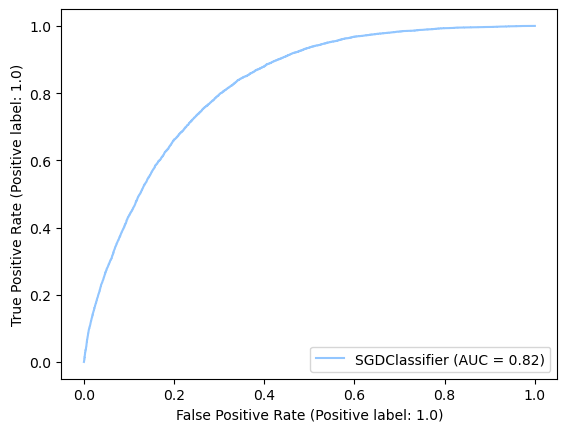

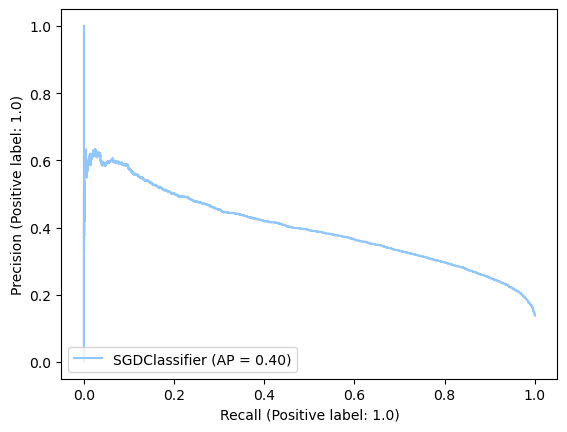

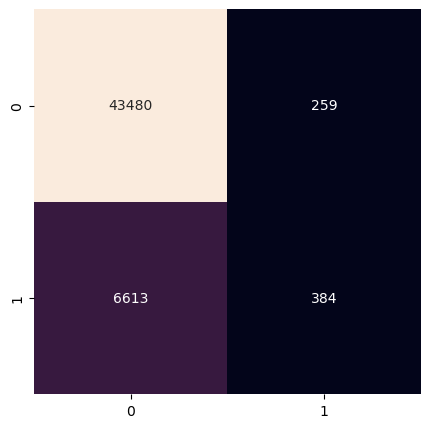

In [763]:
ROC(ideal_sgd, X_test, y_test);
PRC(ideal_sgd, X_test, y_test);
conf_matrix(true_labels, preds)

In [764]:
np.random.seed(42)

preds = ideal_catb.predict(X_test)
true_labels = y_test

evaluate_model(true_labels, preds)

{'Accuracy Score: ': '86.82%',
 'Recall Score': '14.65%',
 'F1 Score': '23.46%',
 'Precision Score: ': '58.87%'}

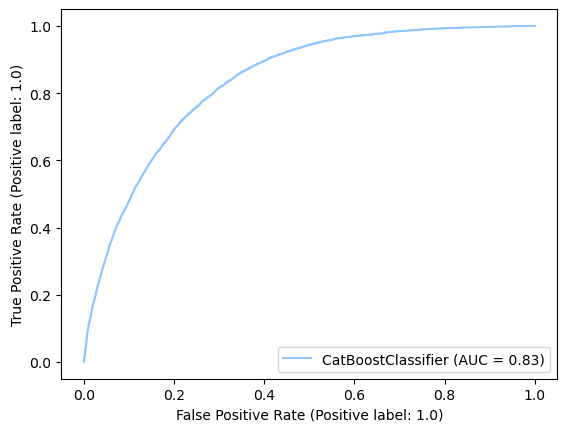

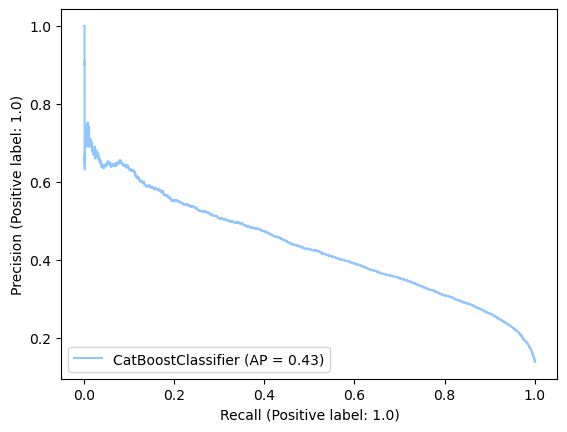

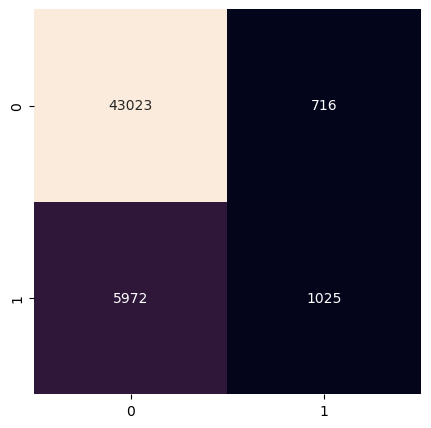

In [765]:
ROC(ideal_catb, X_test, y_test)
PRC(ideal_catb, X_test, y_test);
conf_matrix(true_labels, preds)

# Testing the ideal models on the Data Set where the correlation is 0.1<

In [766]:
np.random.seed(42)

#Splitting the data into features and targets.

X=data_test.drop("Diabetes_binary", axis=1)

y=data_test["Diabetes_binary"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

mass_test(X_train, X_test, y_train, y_test)

{'Linear Regression Score: ': '12.87%',
 'SGD Classifier Score: ': '86.21%',
 'Kernel Approximation Score: ': '86.21%',
 'Catboost Classifier Score: ': '86.64%',
 'Random Forest Classifier: ': '84.8%'}

In [767]:
## Ideal SG on Positive Correlation Only Dataset

np.random.seed(42)

ideal_sgd.fit(X_train, y_train)

preds = ideal_sgd.predict(X_test)
true_labels = y_test

evaluate_model(true_labels, preds)

{'Accuracy Score: ': '86.21%',
 'Recall Score': '0.0%',
 'F1 Score': '0.0%',
 'Precision Score: ': '0.0%'}

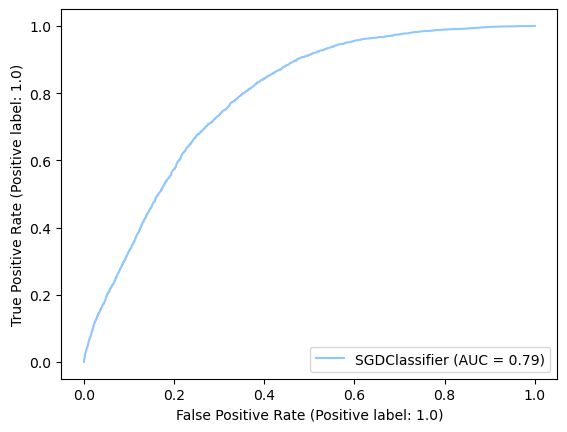

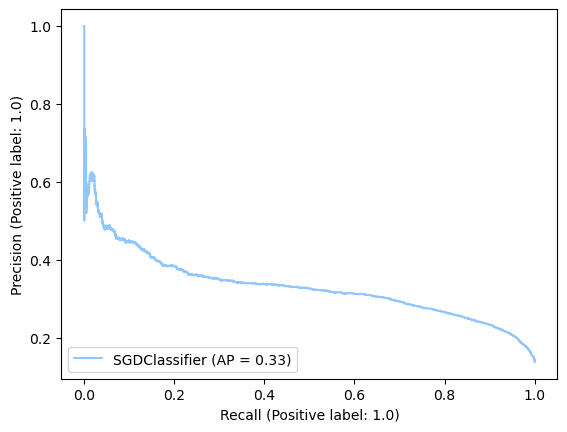

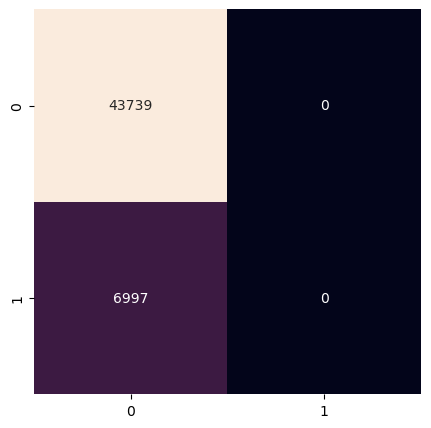

In [768]:
ROC(ideal_sgd, X_test, y_test)
PRC(ideal_sgd, X_test, y_test)
conf_matrix(true_labels, preds)

In [769]:
## Ideal Catboost on Positive Correlation Only Dataset

np.random.seed(42)

ideal_catb.fit(X_train, y_train)

preds = ideal_catb.predict(X_test)
true_labels = y_test

evaluate_model(true_labels, preds)

{'Accuracy Score: ': '86.78%',
 'Recall Score': '14.65%',
 'F1 Score': '23.41%',
 'Precision Score: ': '58.24%'}

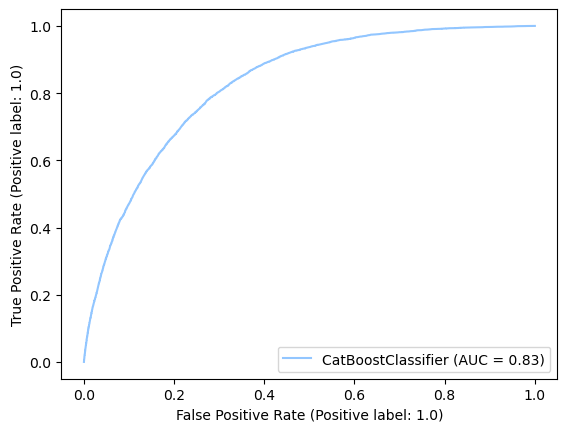

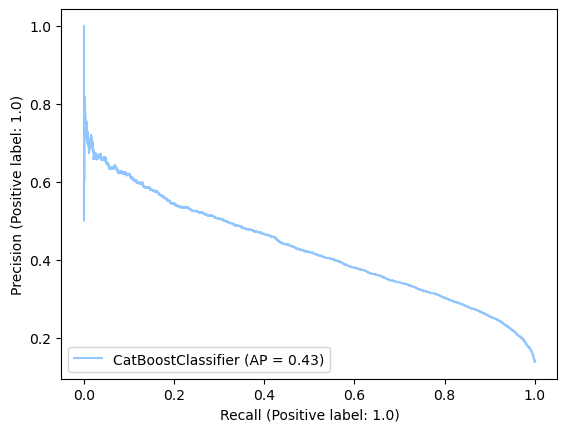

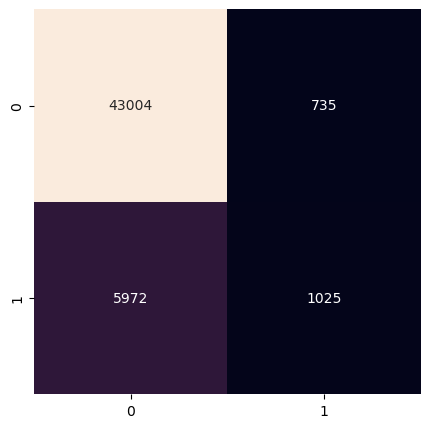

In [770]:
ROC(ideal_catb, X_test, y_test)
PRC(ideal_catb, X_test, y_test)
conf_matrix(true_labels, preds)

# Conclusion

> * Best Model - **CatBoostClassifier**
> * Best Parameters - **(depth=8, iterations=100, learning_rate=0.05, silent=True)**
> * Best Achieved Scores: ***{'Accuracy Score: ': '86.82%',
 'Recall Score': '14.65%',
 'F1 Score': '23.46%',
 'Precision Score: ': '58.87%'}***
 
> As displayed throught the notebook, the percent of people that have diabetes in comparison to those who do not is much higher, which made it very hard for the model to pick up on what exactly makes someone have diabetes, thus making it more likely to predict that people do not have diabetes.

> In my opinion, the best scoring function to use in this dataset would be the **Recall score (TP/(FN+TP))**, as the classes that we are predicting are very skewed, thus the function has produced a 14.65% chance of a correct positive prediction.

> Boban Stevanović 2023